# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [1]:
import numpy as np
import pandas as pd

In [16]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

A = np.random.randint(0,100,(10,10))
print(A)
print(A.shape)

[[19 13 23 63 61 62 34 90 12 72]
 [64 52 82 68 45 87 47  8 39 95]
 [88 12 80 99 47 61 96 78  8 92]
 [29 61 58 28 20 73 46 14 35 22]
 [60 72 77 73 16 83 69  8 81 28]
 [11 13 73 87 32 39 36 30 78 17]
 [62 68 40 95 17 93 26  4 48 71]
 [77 80 90 79 77 66 89 73 10 54]
 [72 25 57 33 79 85 76 32 96 32]
 [20 79 63 32 75 38 36 92 75 17]]
(10, 10)


In [17]:
# Посчитайте средние значения в матрице по столбцам

A.mean(axis=0)

array([50.2, 47.5, 64.3, 65.7, 46.9, 68.7, 55.5, 42.9, 48.2, 50. ])

In [18]:
# Транспонируйте матрицу A

A.T

array([[19, 64, 88, 29, 60, 11, 62, 77, 72, 20],
       [13, 52, 12, 61, 72, 13, 68, 80, 25, 79],
       [23, 82, 80, 58, 77, 73, 40, 90, 57, 63],
       [63, 68, 99, 28, 73, 87, 95, 79, 33, 32],
       [61, 45, 47, 20, 16, 32, 17, 77, 79, 75],
       [62, 87, 61, 73, 83, 39, 93, 66, 85, 38],
       [34, 47, 96, 46, 69, 36, 26, 89, 76, 36],
       [90,  8, 78, 14,  8, 30,  4, 73, 32, 92],
       [12, 39,  8, 35, 81, 78, 48, 10, 96, 75],
       [72, 95, 92, 22, 28, 17, 71, 54, 32, 17]])

In [19]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

A * A.T

array([[ 361,  832, 2024, 1827, 3660,  682, 2108, 6930,  864, 1440],
       [ 832, 2704,  984, 4148, 3240, 1131, 3196,  640,  975, 7505],
       [2024,  984, 6400, 5742, 3619, 4453, 3840, 7020,  456, 5796],
       [1827, 4148, 5742,  784, 1460, 6351, 4370, 1106, 1155,  704],
       [3660, 3240, 3619, 1460,  256, 2656, 1173,  616, 6399, 2100],
       [ 682, 1131, 4453, 6351, 2656, 1521, 3348, 1980, 6630,  646],
       [2108, 3196, 3840, 4370, 1173, 3348,  676,  356, 3648, 2556],
       [6930,  640, 7020, 1106,  616, 1980,  356, 5329,  320, 4968],
       [ 864,  975,  456, 1155, 6399, 6630, 3648,  320, 9216, 2400],
       [1440, 7505, 5796,  704, 2100,  646, 2556, 4968, 2400,  289]])

In [20]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

B = A @ A
print(B)

[[20728 25740 30900 29009 20901 28650 25202 20552 21985 17749]
 [25627 25355 36864 37868 26583 37410 30175 27254 29468 27959]
 [30216 33180 40334 44280 29522 43139 34587 32646 27250 32215]
 [19264 15203 25283 27647 16731 26207 20611 14714 18843 21152]
 [27800 21701 34830 37488 25179 39469 29936 21650 27737 30108]
 [22835 17954 27173 25877 18546 29398 25753 15826 20693 19177]
 [20644 21947 32419 31124 23737 33633 25271 21964 26893 23556]
 [35079 33870 44962 49056 29425 47953 37856 29265 28926 37939]
 [29344 24382 35876 39905 26580 40953 32396 23426 32063 27926]
 [31882 25996 37449 36253 25688 38440 33892 20358 25107 28404]]


### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [31]:
all_data = pd.read_csv('forest_dataset.csv')

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [32]:
train_size = 0.2
ind = int(all_data.shape[0] * train_size)
delayed_data = all_data[:ind]
all_data = all_data[ind:]


Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [34]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [35]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [36]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [37]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix,two_class_labels)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [41]:
lr_clf = LogisticRegression()

In [42]:
lr_clf.fit(train_feature_matrix,train_labels)
print('Accuracy score:',accuracy_score(test_labels,lr_clf.predict(test_feature_matrix)))
print('F1 score:',f1_score(test_labels,lr_clf.predict(test_feature_matrix)))

Accuracy score: 0.7843366452367037
F1 score: 0.74321503131524


C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [44]:
lr_clf = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(feature_matrix,labels,test_size=0.2,random_state=42)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.linspace(0.01, 1, 10),
    'penalty': ['l1','l2']
}
grid = GridSearchCV(lr_clf,param_grid,cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'au

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'au

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear fai

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'au

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'au

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

[0.66796875 0.67765625 0.69234375 0.6946875  0.70015625 0.69671875
 0.70234375 0.6990625  0.70390625 0.699375   0.705      0.7015625
 0.70578125 0.7015625  0.70609375 0.70296875 0.70625    0.70015625
 0.70625    0.70375   ]
[0.66796875 0.69234375 0.70015625 0.70234375 0.70390625 0.705
 0.70578125 0.70609375 0.70625    0.70625   ]
[0.67765625 0.6946875  0.69671875 0.6990625  0.699375   0.7015625
 0.7015625  0.70296875 0.70015625 0.70375   ]


Text(0.5, 1.0, 'accuracy score with L2 regularization')

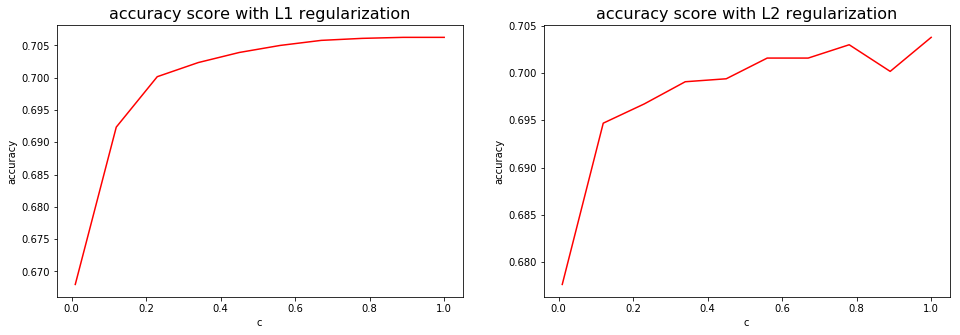

In [99]:
import matplotlib.pyplot as plt

x_c = np.linspace(0.01, 1, 10)
print(grid.cv_results_['mean_test_score'])
y_l1 = grid.cv_results_['mean_test_score'][::2]
y_l2 = grid.cv_results_['mean_test_score'][1::2]
print(y_l1)
print(y_l2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].plot(x_c, y_l1, 'r')
axes[0].set_xlabel('c')
axes[0].set_ylabel('accuracy')
axes[0].set_title(f'accuracy score with L1 regularization', fontsize=16)
axes[1].plot(x_c, y_l2, 'r')
axes[1].set_xlabel('c')
axes[1].set_ylabel('accuracy')
axes[1].set_title(f'accuracy score with L2 regularization', fontsize=16)

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [73]:
# Видим, что при увеличении коэффициента регуляризации увеличивается средняя точность на тестовой выборке
print(grid.best_estimator_.C)
print(grid.best_estimator_.penalty)

0.89
l1


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [74]:
best_lr_clf = LogisticRegression(C=grid.best_estimator_.C,penalty=grid.best_estimator_.penalty)

best_lr_clf.fit(X_train,y_train)
probs_matrix = best_lr_clf.predict_proba(X_test)

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [85]:
print(probs_matrix.mean(axis=0))
print(np.unique(y_train, return_counts=True)[1]/X_train.shape[0])

[0.35940947 0.49144027 0.06721252 0.00457043 0.01775362 0.03176192
 0.02785178]
[0.37046875 0.48671875 0.05796875 0.004375   0.01765625 0.0296875
 0.033125  ]


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn_clsfr = KNeighborsClassifier()

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [90]:
param_grid_knn = {
    'n_neighbors': np.arange(1,11),
    'weights': ['uniform','distance']
}
grid_knn = GridSearchCV(knn_clsfr,param_grid_knn,cv=5, scoring='accuracy')
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Text(0.5, 1.0, "Accuracy with distance param 'uniform'")

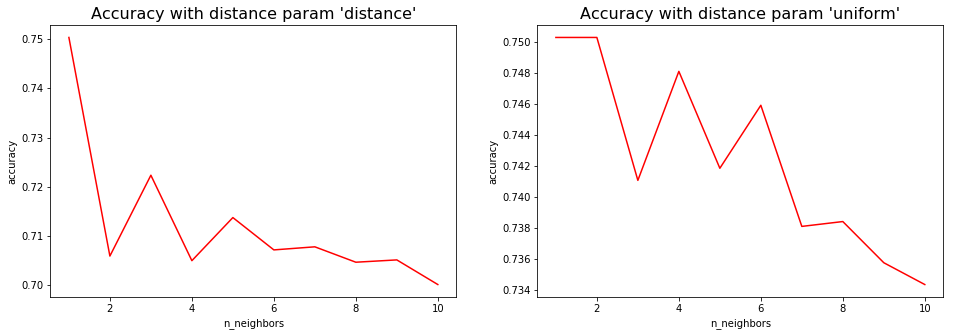

In [106]:
x_knn = np.arange(1,11)
y_dist = grid_knn.cv_results_['mean_test_score'][::2]
y_uni = grid_knn.cv_results_['mean_test_score'][1::2]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].plot(x_knn, y_dist, 'r')
axes[0].set_xlabel('n_neighbors')
axes[0].set_ylabel('accuracy')
axes[0].set_title(f"Accuracy with distance param 'distance'", fontsize=16)
axes[1].plot(x_knn, y_uni, 'r')
axes[1].set_xlabel('n_neighbors')
axes[1].set_ylabel('accuracy')
axes[1].set_title(f"Accuracy with distance param 'uniform'", fontsize=16)

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [103]:
grid_knn.best_estimator_.predict_proba(X_test)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [105]:
y_delayed = delayed_data[delayed_data.columns[-1]].values
X_delayed = delayed_data[delayed_data.columns[:-1]].values
#print(y_delayed)
#print(X_delayed)
print('KNN prediction:',accuracy_score(y_delayed,grid_knn.best_estimator_.predict(X_delayed)))
print('Logreg prediction:',accuracy_score(y_delayed,grid.best_estimator_.predict(X_delayed)))

KNN prediction: 0.7585
Logreg prediction: 0.715


Как видим, метод ближайшего соседа(где число соседей равно единице) в данном случае сработал лучше.